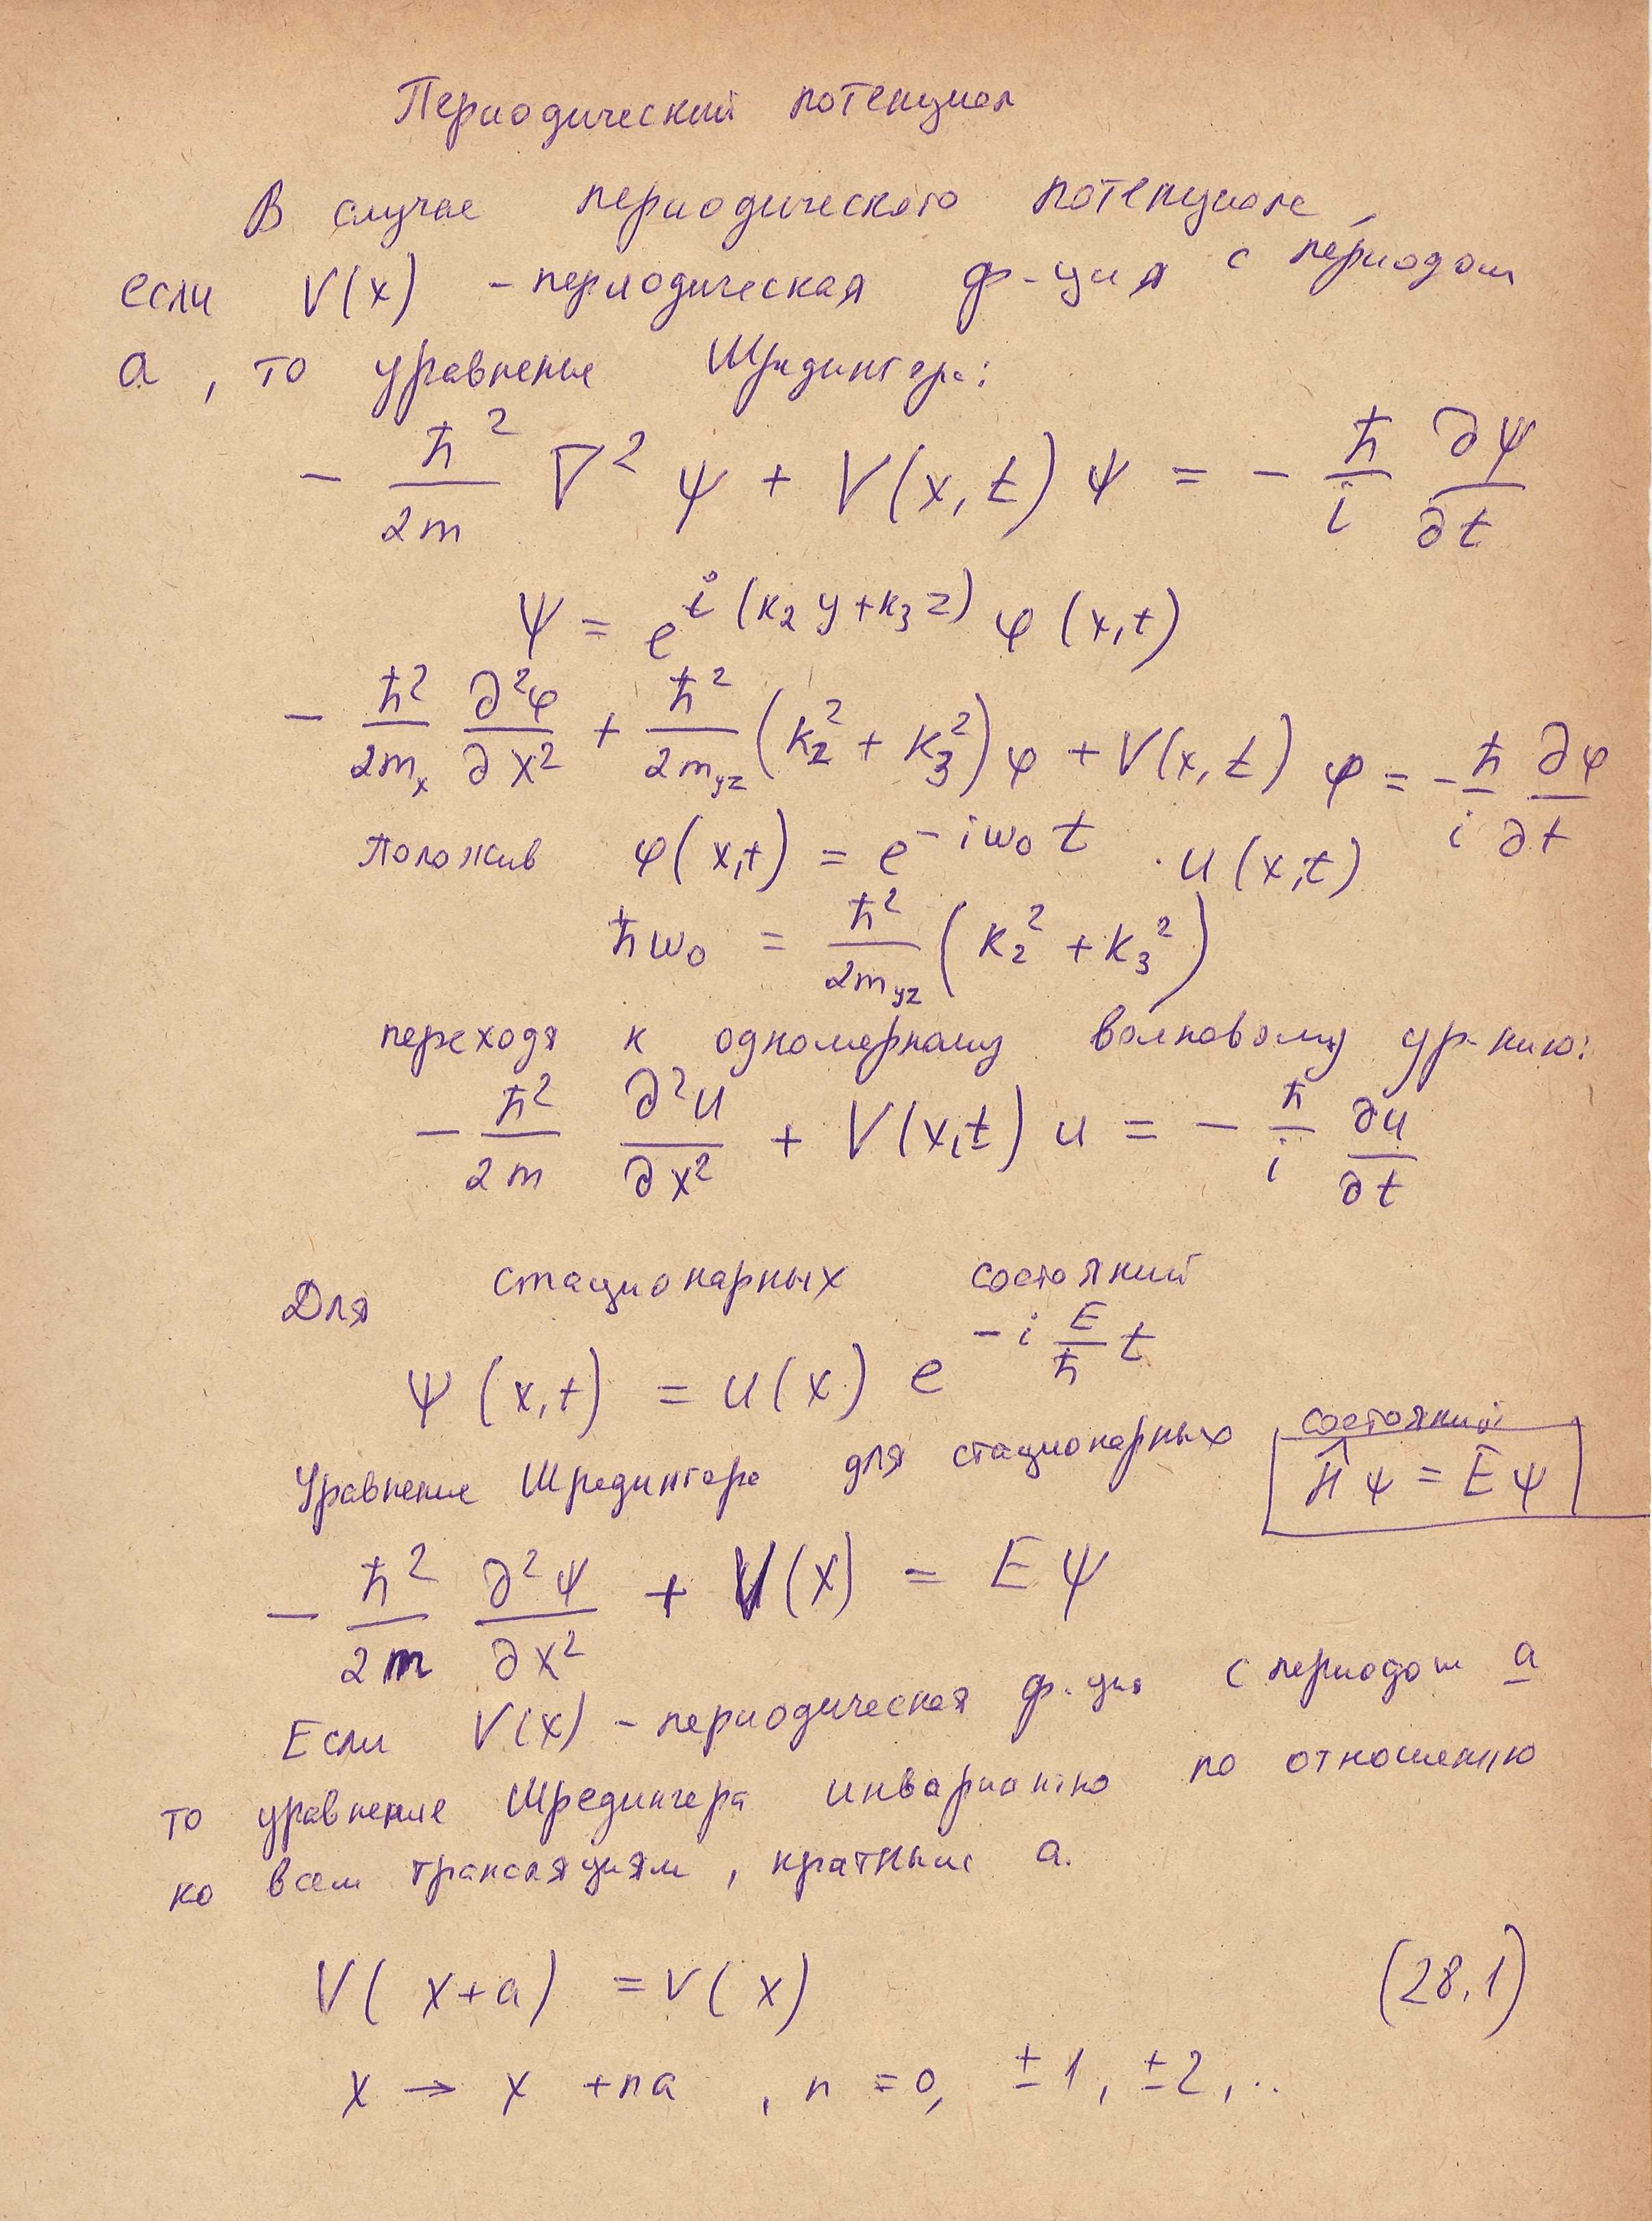

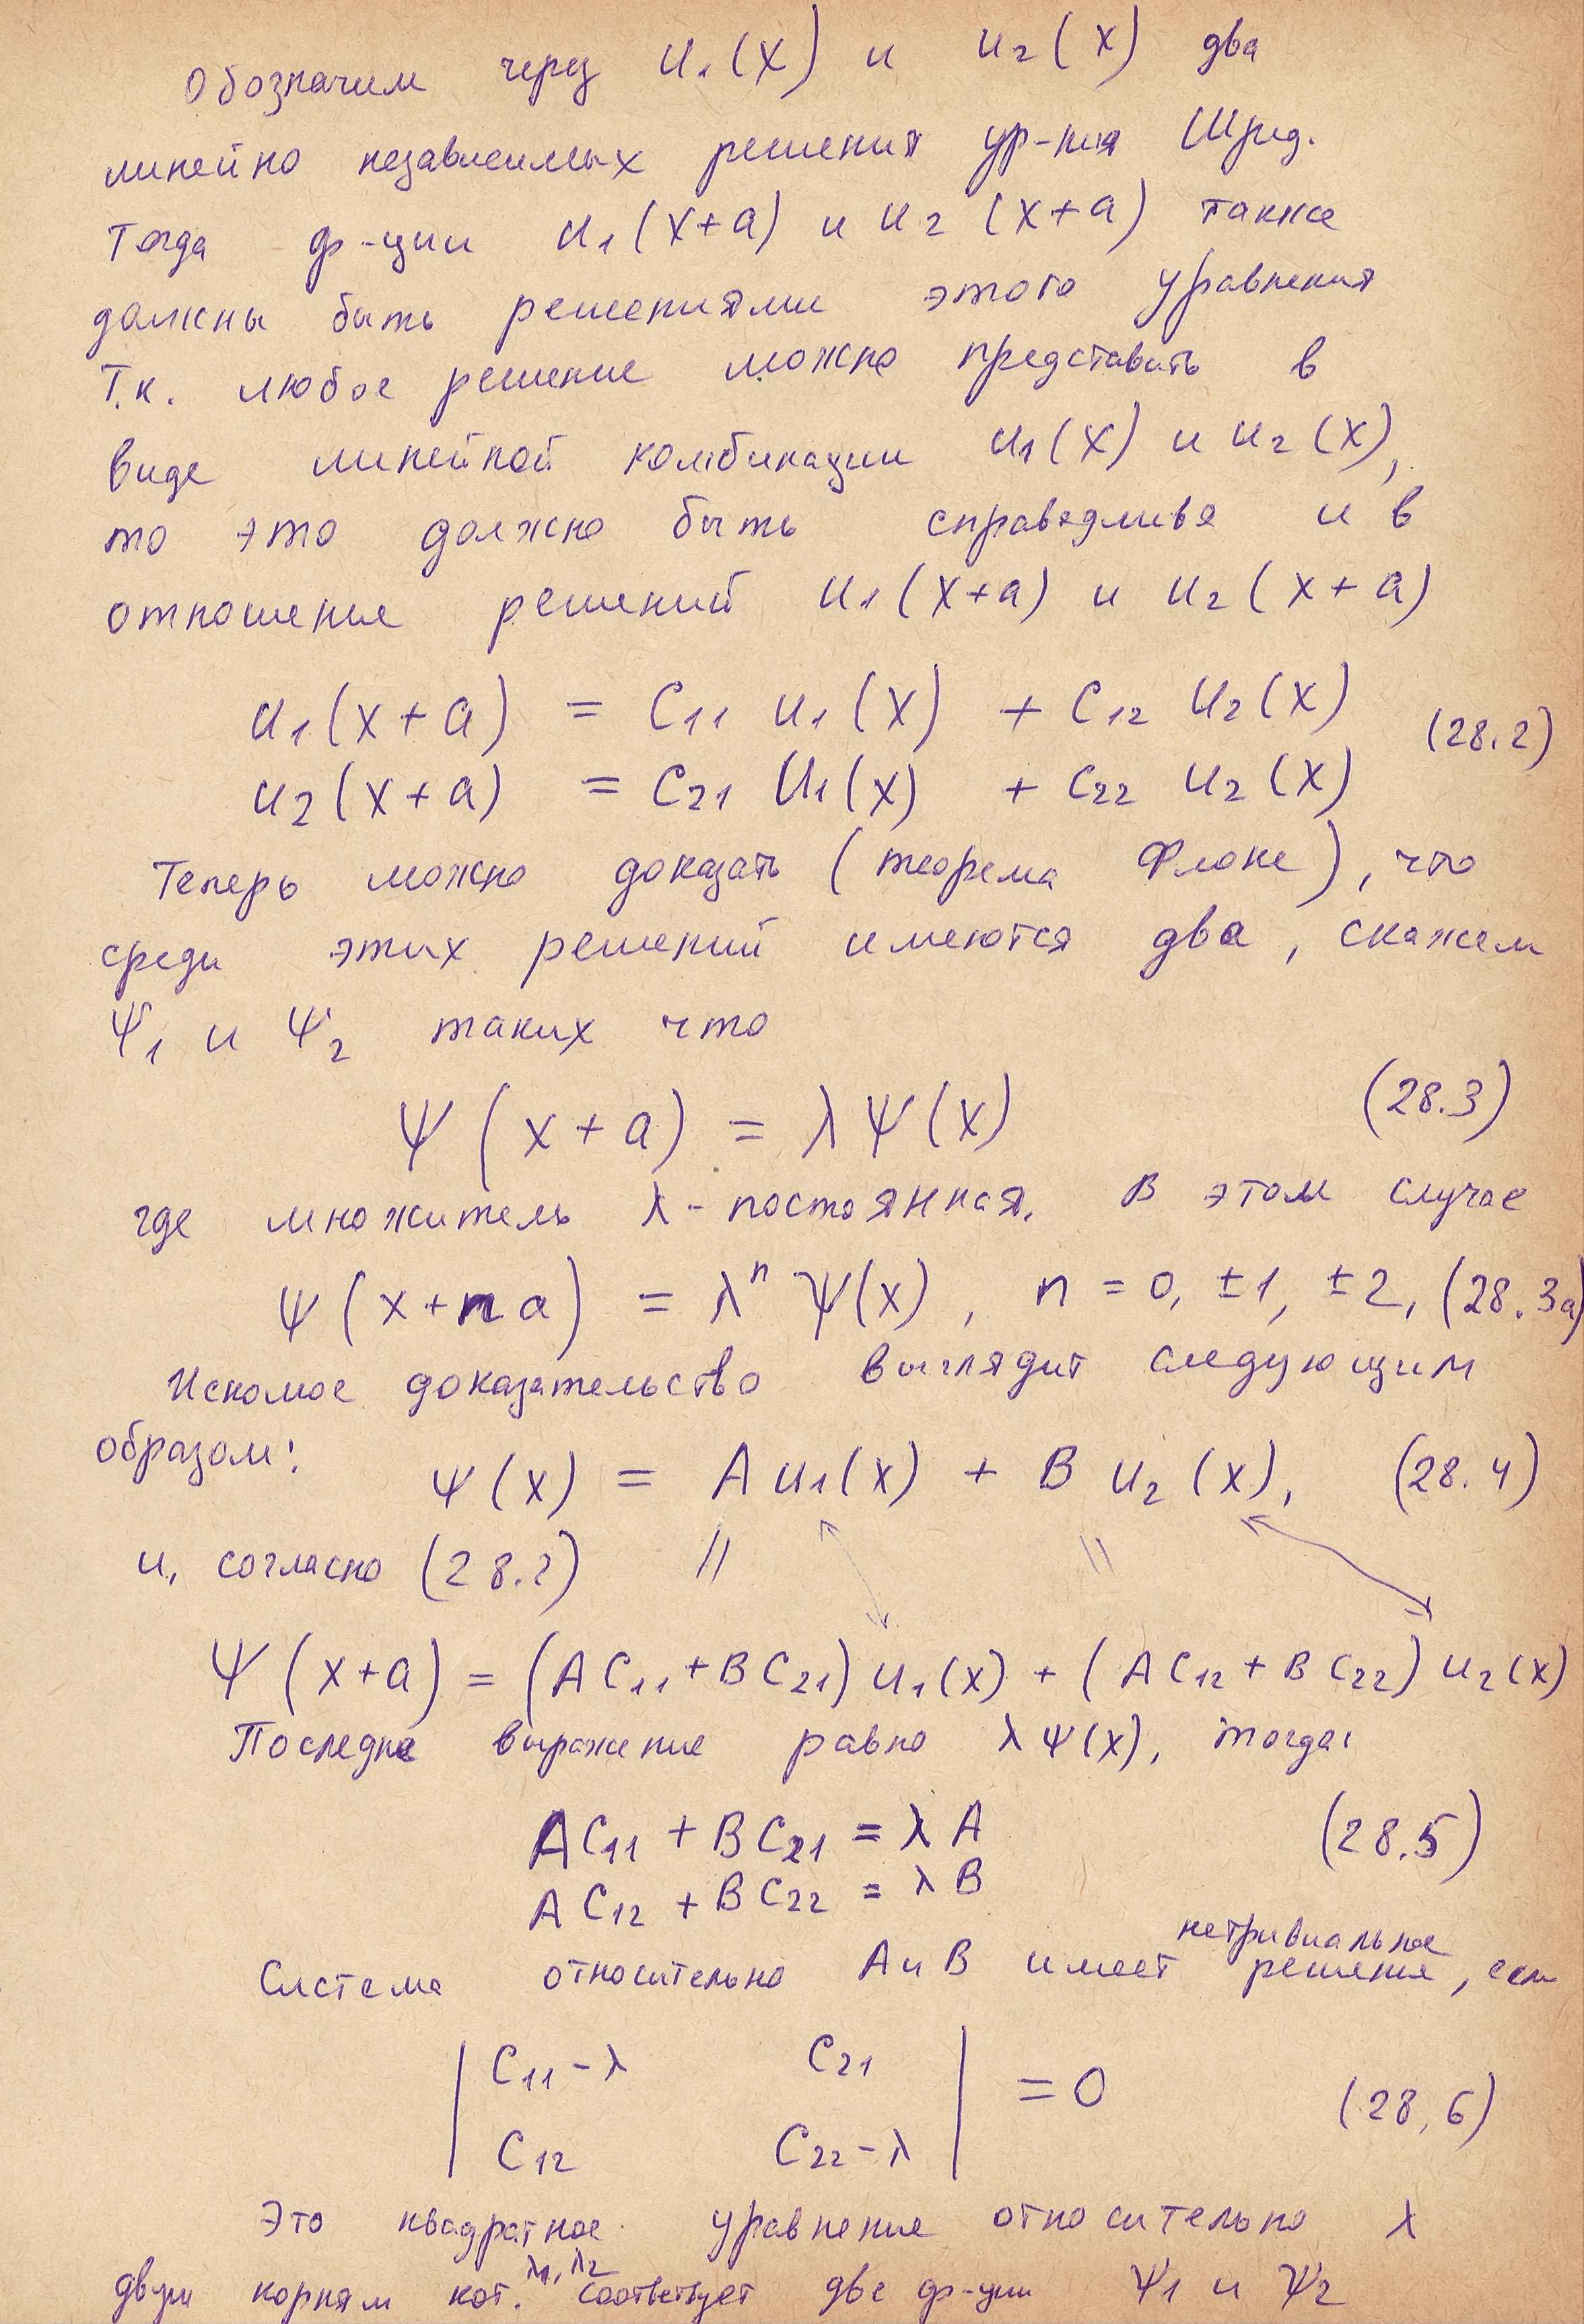

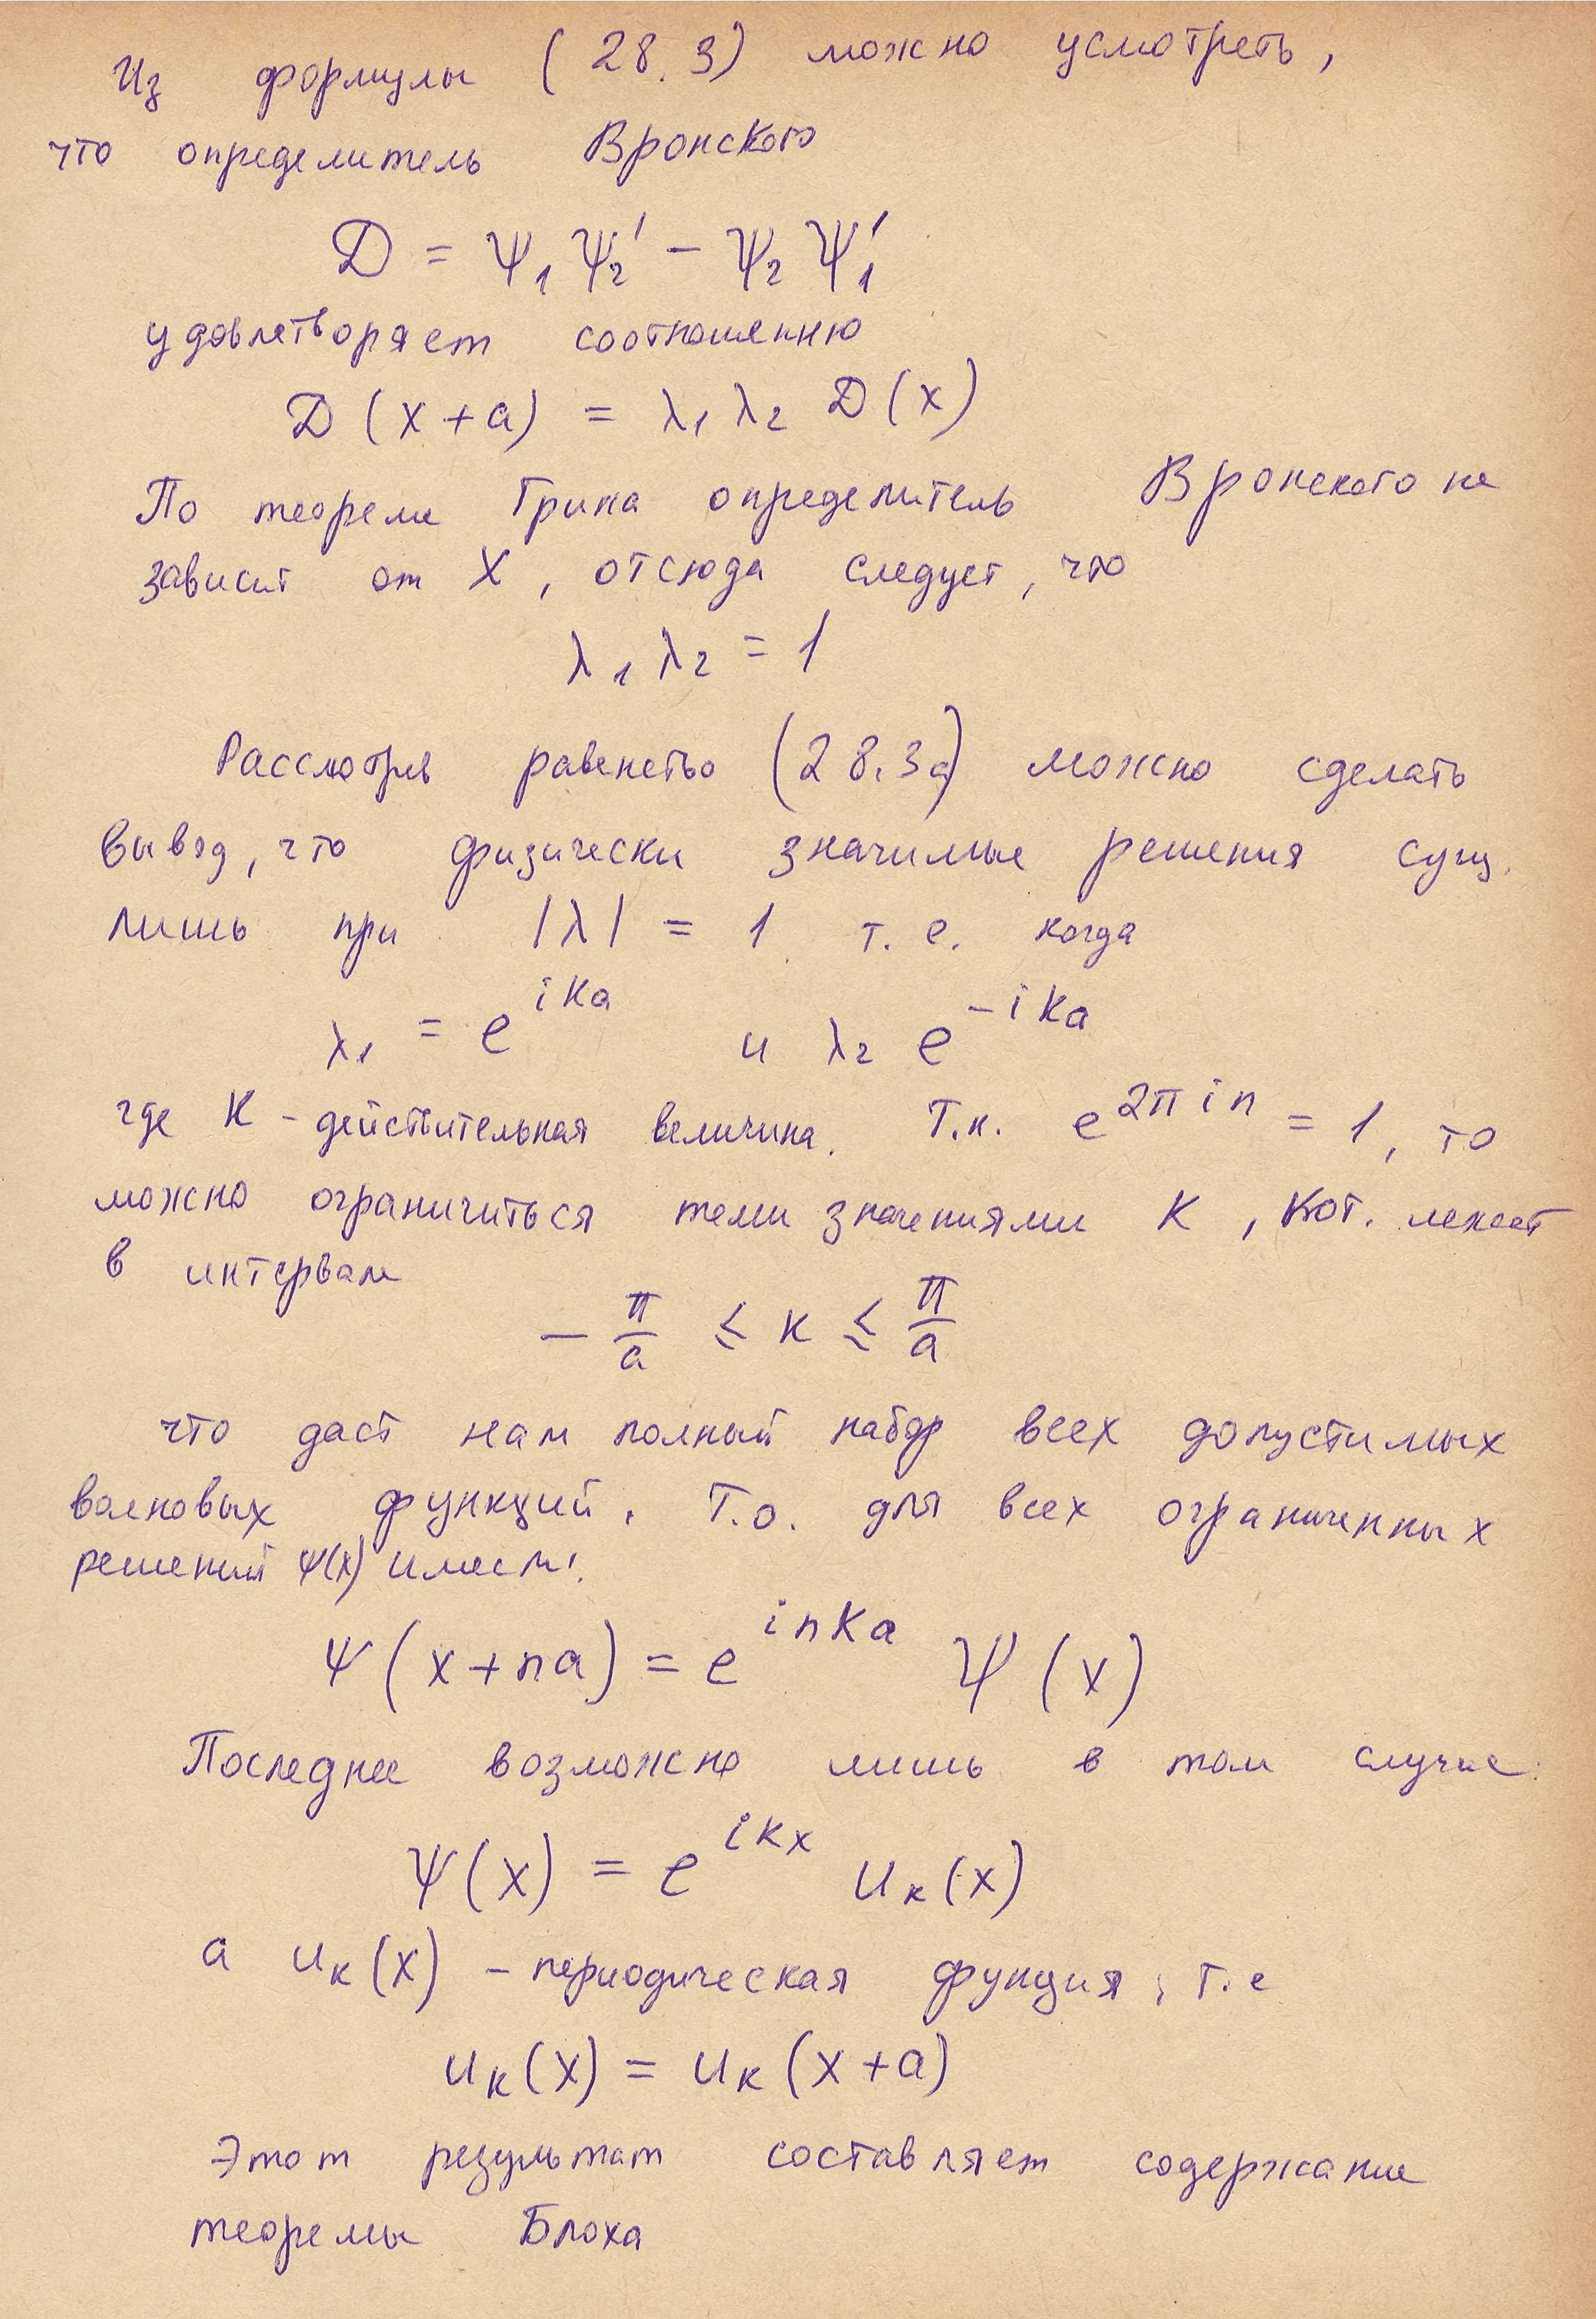

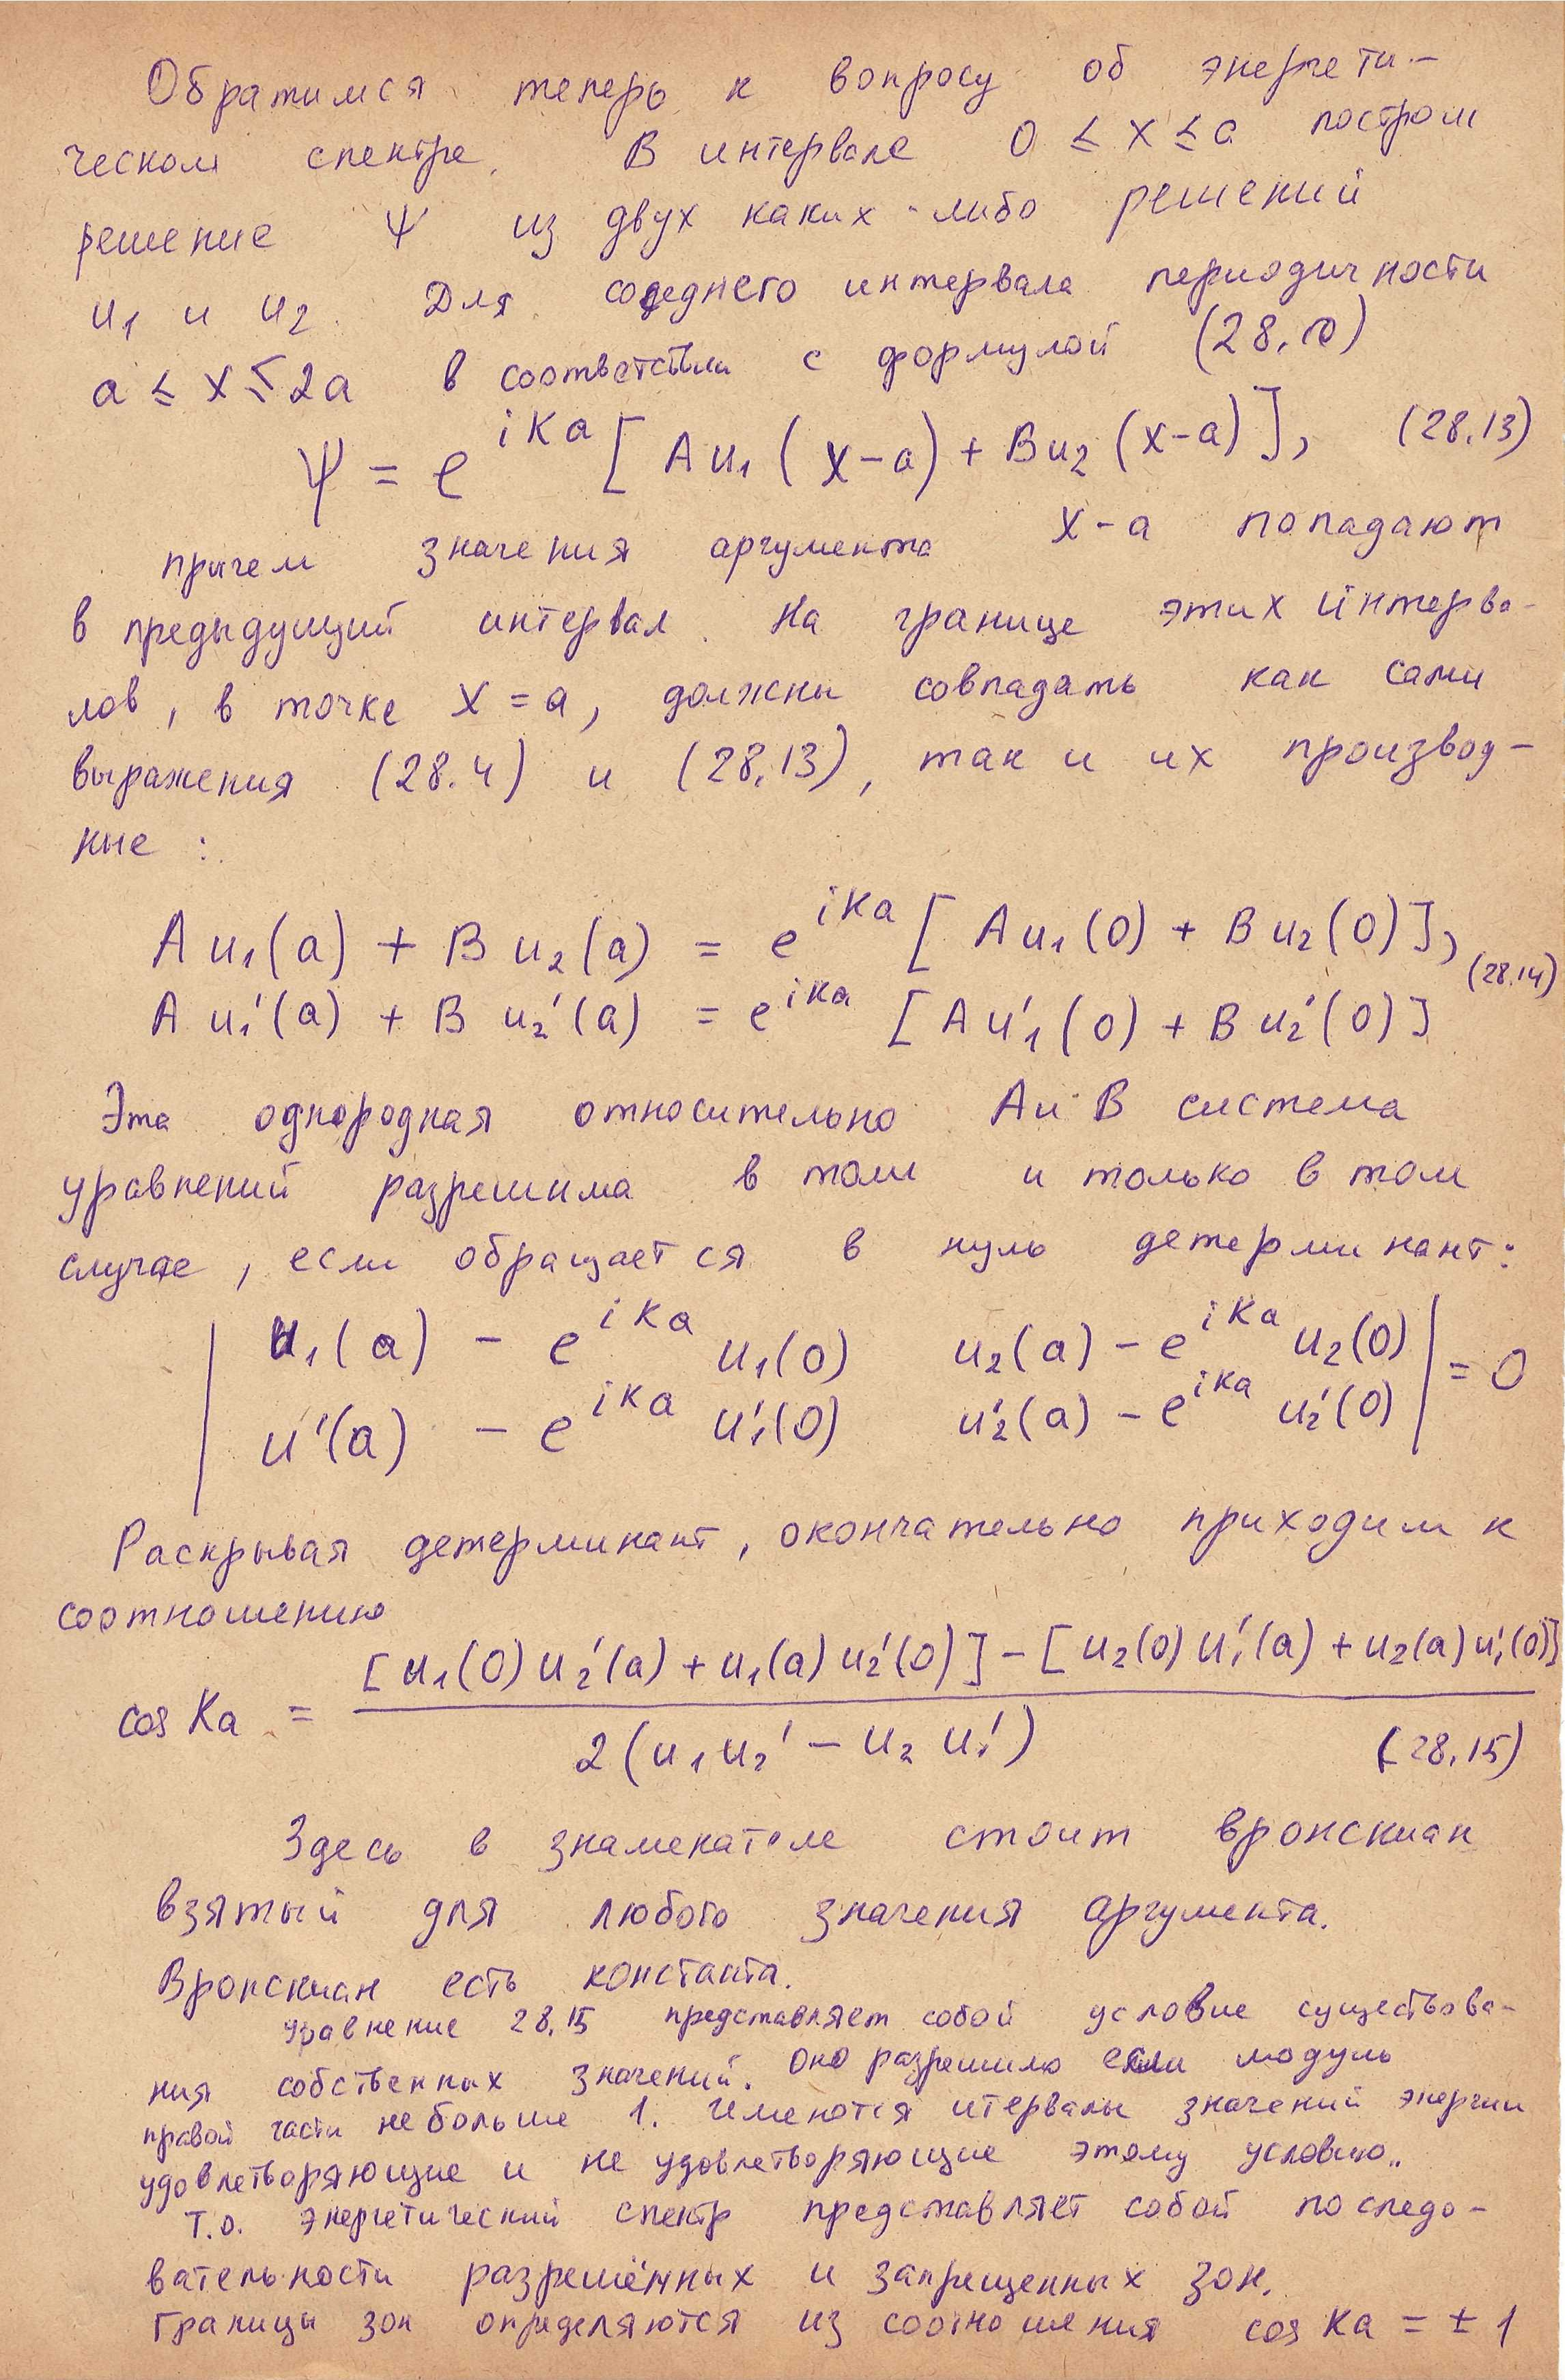

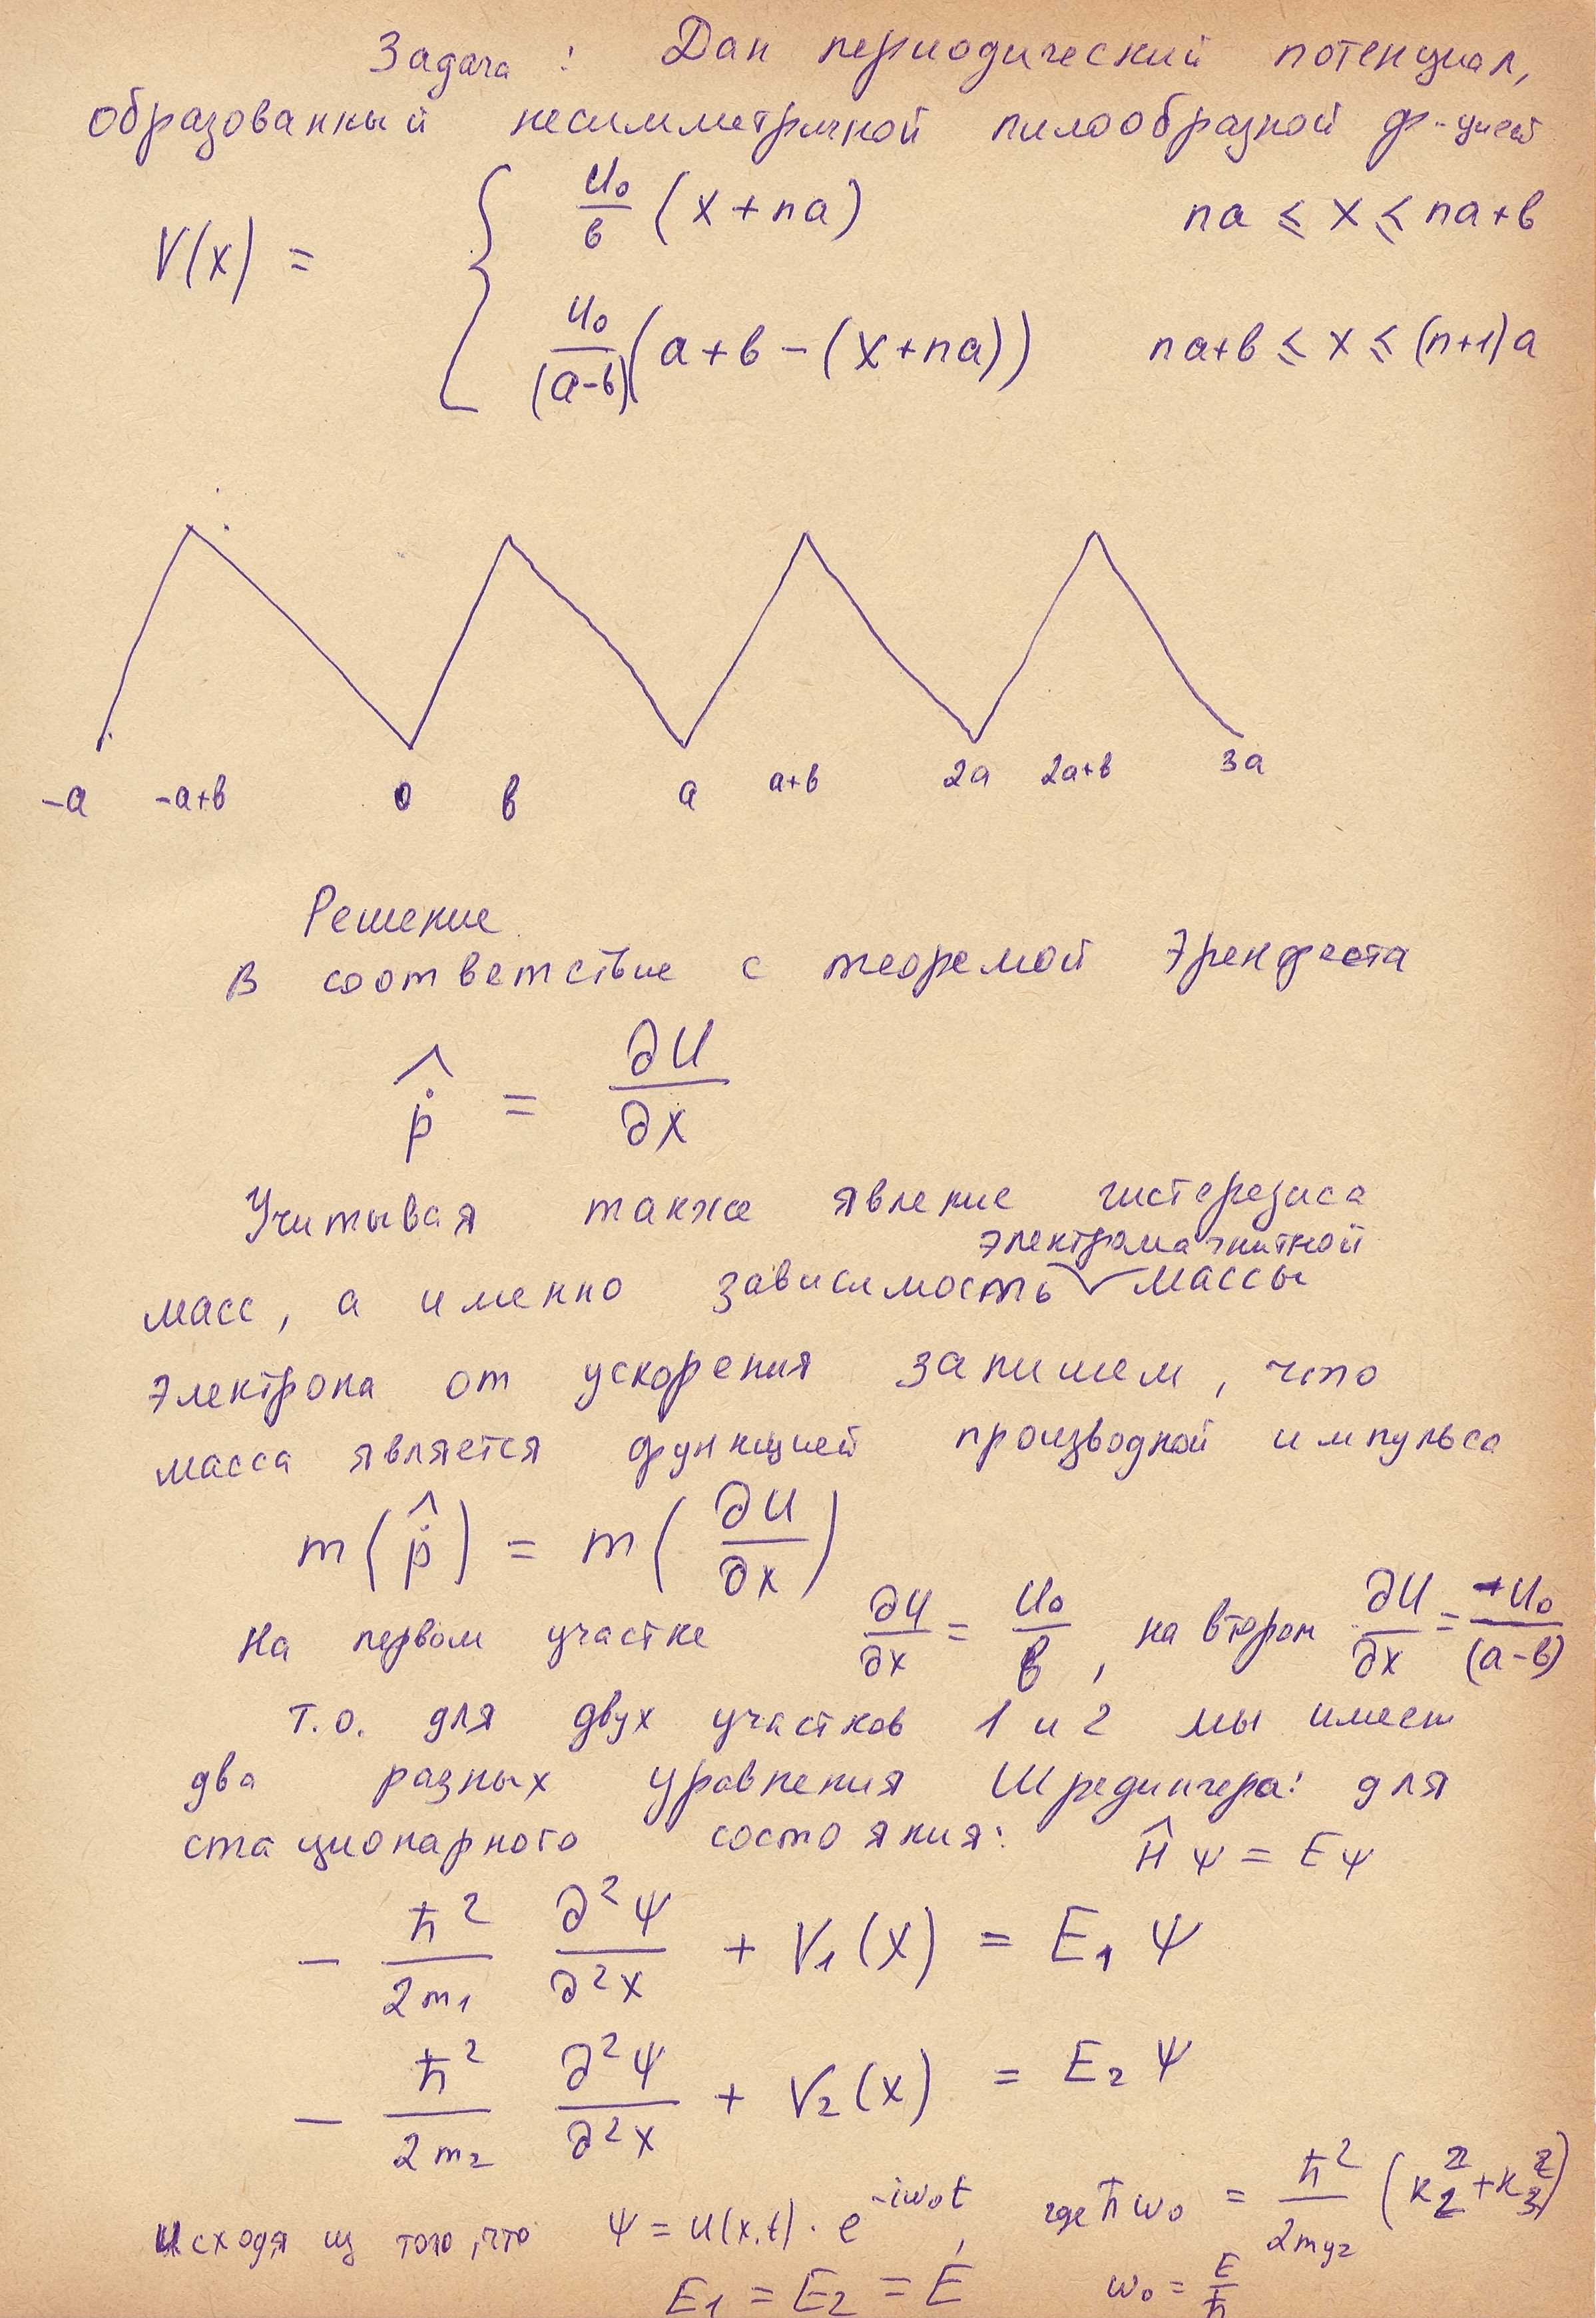

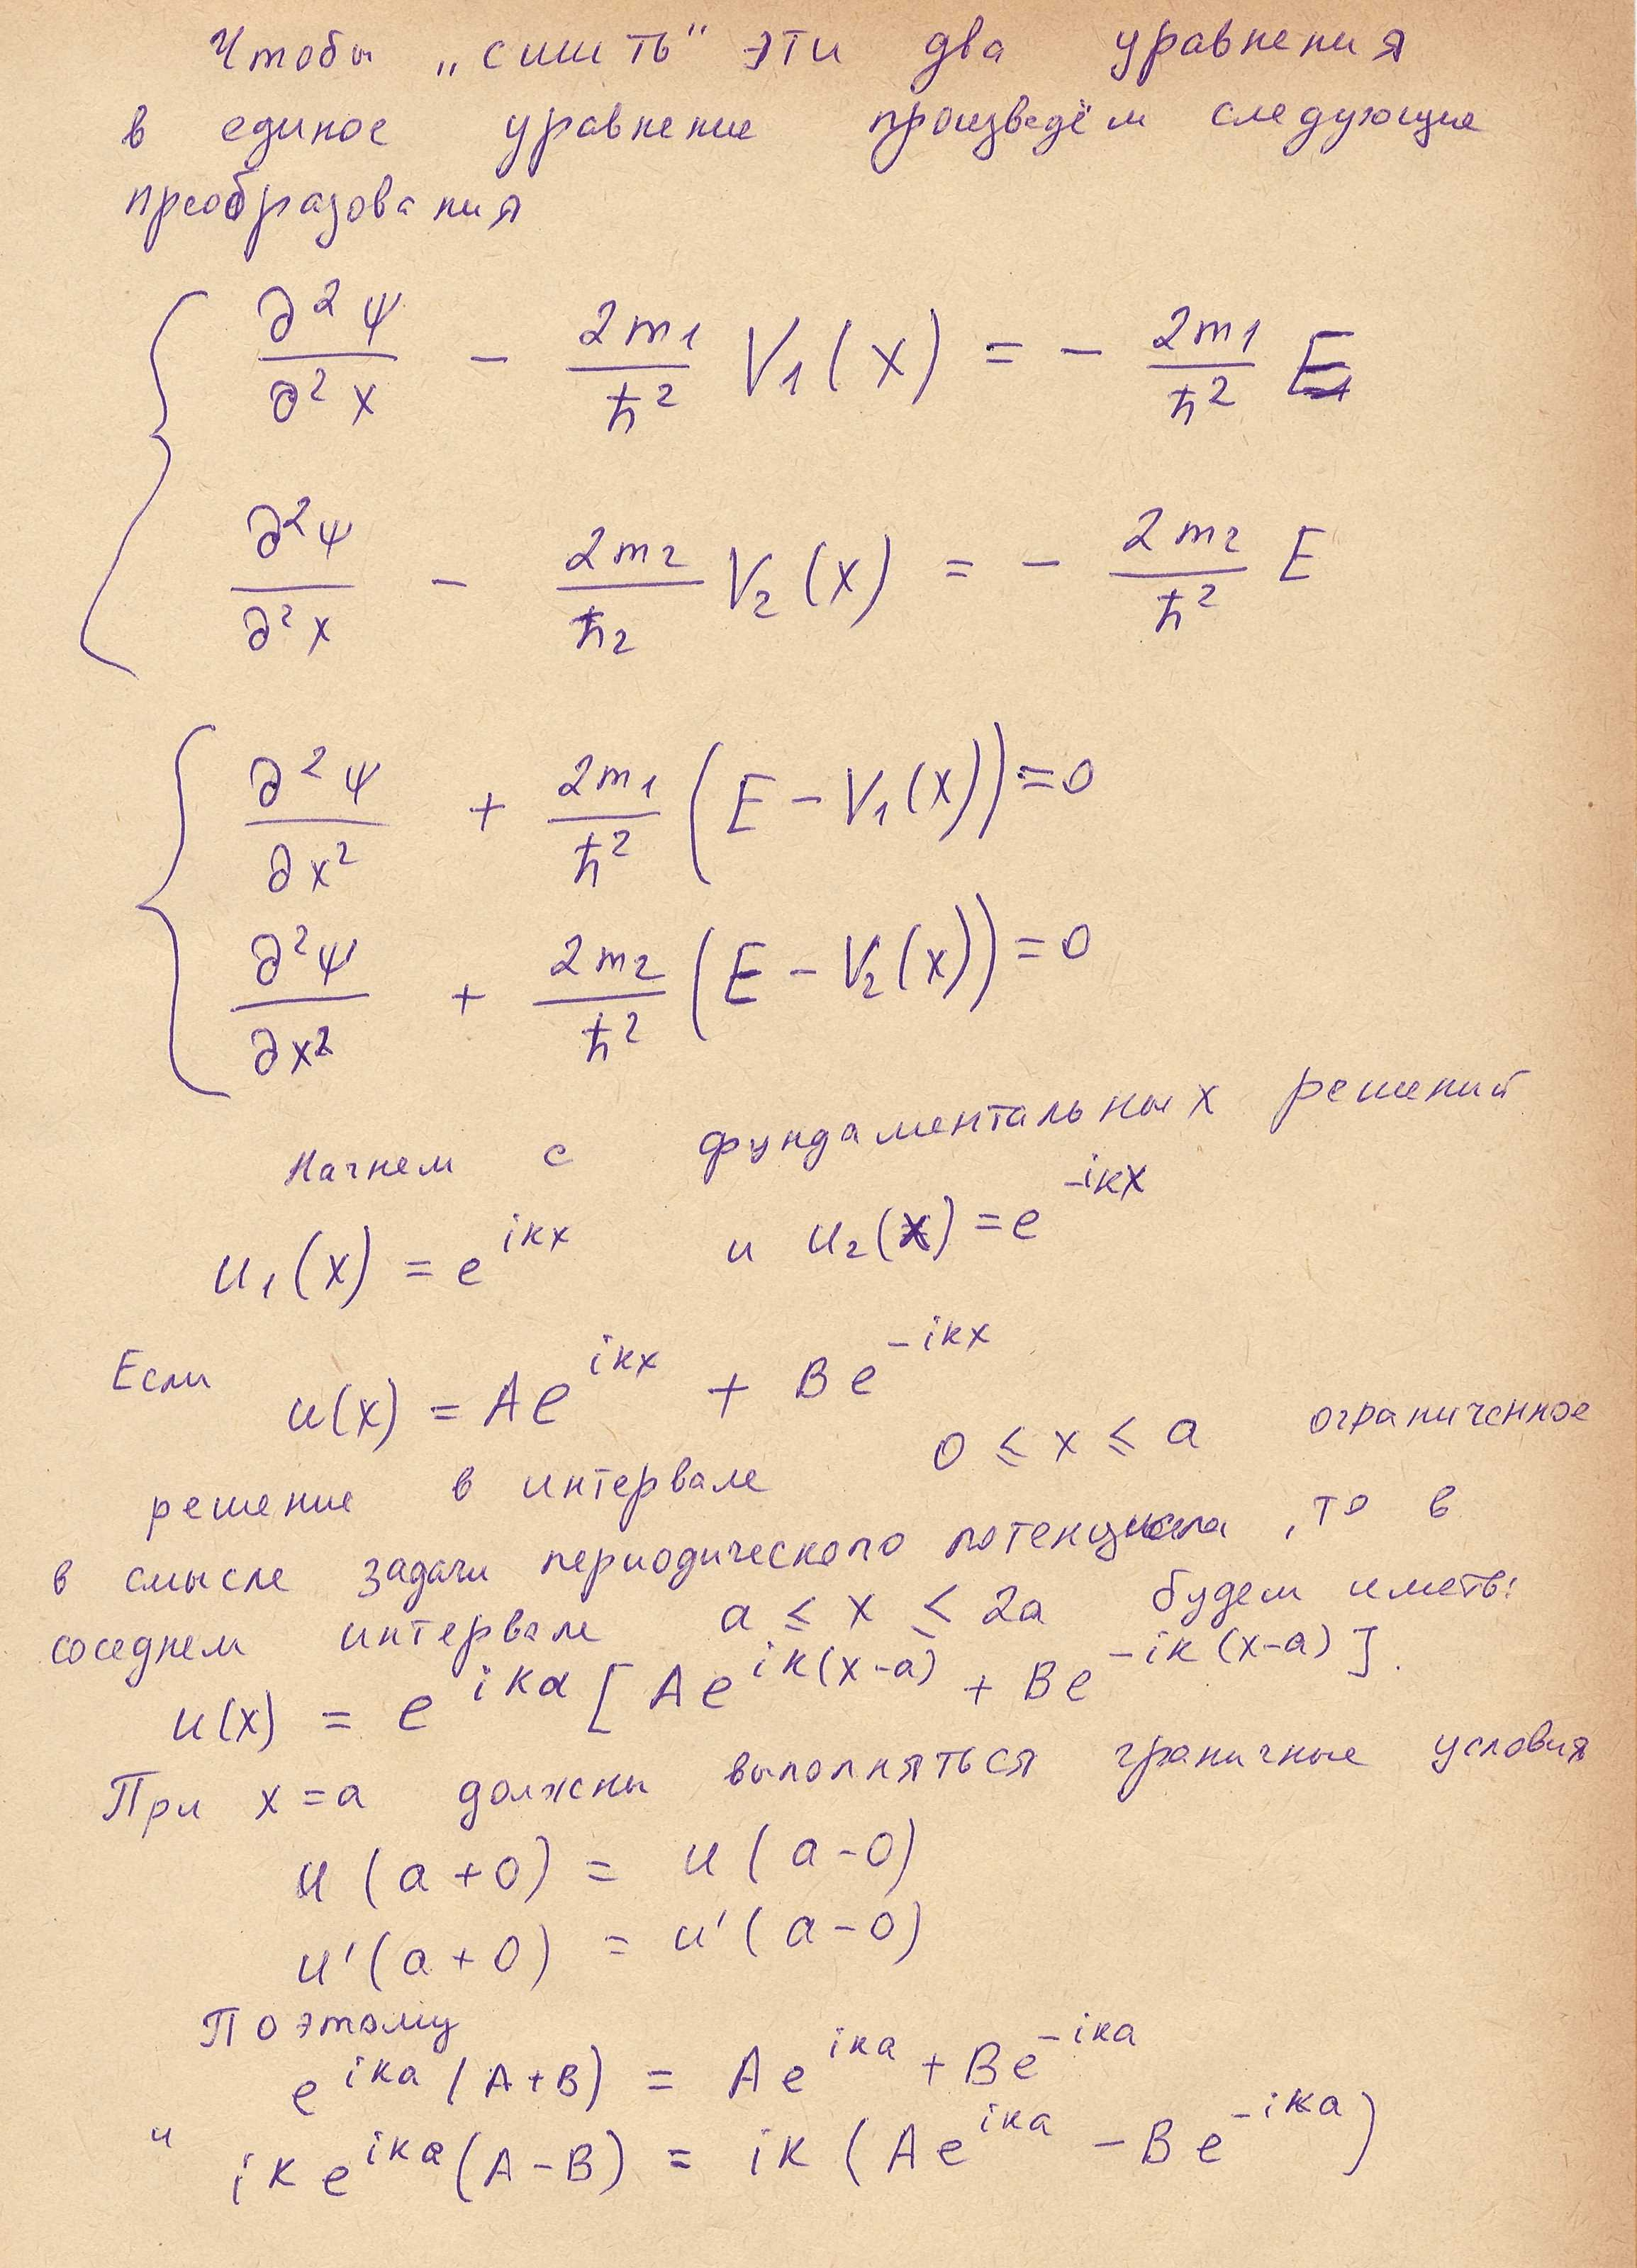

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))
    
def displ(tex):
    display(Math(tex))

In [2]:
var("x, m_1, m_2, E, h, U_0, a, b, n, K, A, B, C, D, _K1, _K2, _C0, _C1, k, kappa, k_0")
u_1=function('u_1')(x)
u_2=function('u_2')(x)

In [127]:
assume(U_0, "real")
assume(U_0 >0)
assume(E, "real")

assume(m_1, "real")
assume(m_1 > 0)

assume(m_2, "real")
assume(m_2 > 0)

assume(K, "real")
assume(k, "real")

assume(a, "real")
assume(b, "real")
assume(a > 0)
assume(b > 0)
assume(a > b)

assume(n, "real")
assume(n, "integer")

assume(h, "real")
assume(h > 0)

In [4]:
U_1(x,n) = U_0/b     * (x-n*a)
U_2(x,n) = U_0/(a-b) * (a-(x-n*a))
disp(U_1(x,n))
disp(U_2(x,n))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
_a = 5
_b = 1
values = [U_0 == 10, b == _b, a == _a]

In [6]:
plt = Graphics()
for _n in range(-1,2):
    plt += plot(U_1(x, n = _n).subs(values), x, _n*_a, _n*_a+_b)
    plt += plot(U_2(x, n = _n).subs(values), x, _n*_a+_b, (_n+1)*_a)

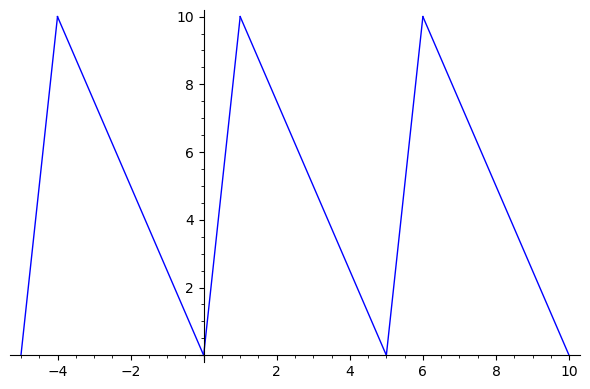

In [7]:
plt.show()

${\displaystyle \hbar \equiv {\frac {h}{2\pi }}=1{,}054\ 571\ 817\times 10^{-34}}$ Дж · c
$={\displaystyle 6{,}582\ 119\ 569\cdot 10^{-16}}$ эВ·с

In [8]:
hbar = 1.054571817*10^(-34) # Дж · c

In [9]:
m_e = 9.109383713928*10^(-31) # кг[2],

1 эВ = 1,602 176 634⋅10−19 Дж (точно) = 1,602 176 634⋅10−12 эрг (точно)

In [10]:
eV = 1.602176634*10^(-19)

Например, элементарная ячейка алмаза — кубическая и имеет параметр решётки 0,357 нм при температуре 300 К

In [11]:
_a = 3 * 0.357 * 10^-9 # m
_b = _a / 5

In [271]:
values_mh = [ m_1 == 0.98*m_e,
              m_2 == 0.99*m_e,
              h == hbar]

values_amh = [a == _a] + values_mh

values_abmh = [b == _b] + values_amh

values_UE = [U_0 == 2*eV,
             E == 1*eV]

values = values_abmh + values_UE

# Уравнение Шредингера на интервале от $0$ до $b$

$$\frac {\partial^2 u}{\partial x^2} + \frac{2 m_1}{\hbar^2} \left(E - U_1(x)\right)u = 0$$

In [13]:
eq_0b(n) = diff(u_1,x,2) + 2*m_1/h^2 * (E - U_1(x,n)) * u_1 == 0
disp(eq_0b(n))

<IPython.core.display.Math object>

In [14]:
disp(eq_0b(n=0).expand())

<IPython.core.display.Math object>

делаем замену переменных

In [15]:
var("A,B,C,D")

(A, B, C, D)

In [16]:
_A = 0
_B = 0
eq_0b_d2 = 0
for operand in eq_0b(n=0).expand().lhs().operands():
    from sage.symbolic.operators import add_vararg, mul_vararg
    if mul_vararg == operand.operator():
        op = operand.operands()
        if x in op:
            _B += (operand/x/u_1(x=x)).full_simplify()
        else:
            _A += operand/u_1(x=x)
    else:
        eq_0b_d2 += operand

In [17]:
disp(eq_0b(n=0).expand())

<IPython.core.display.Math object>

In [18]:
sA = A == _A
sB = B == _B
disp(sA)
disp(sB)
eq_0b_subs = eq_0b_d2 + (A + B*x)*u_1(x=x) == 0
disp(eq_0b_subs)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Как и в задаче 40 Флюге т.1 вводим обозначение

In [19]:
var("l_1, lambda_1, xi_1")

(l_1, lambda_1, xi_1)

характерная длина $l_1$

In [20]:
eq_len_1 = -_B == 1/l_1^3
disp(eq_len_1)

<IPython.core.display.Math object>

$\frac{Дж \cdot кг}{м\left(Дж \cdot c\right)^2} = \frac{1}{м^3}$

$Дж = кг \cdot м^2 \cdot c^{-2}$

$\frac{кг}{Дж \cdot м\left(c\right)^2} = \frac{1}{м^3}$

безразмерный энергетический параметр $\lambda_1$

In [21]:
energy_param_1 = _A == lambda_1 / l_1^2
disp(energy_param_1)

<IPython.core.display.Math object>

$\frac{Дж \cdot кг}{\left(Дж \cdot c\right)^2} = \frac{[\lambda_1]}{м^2}$

$\frac{кг}{Дж \cdot \left(c\right)^2} = \frac{[\lambda_1]}{м^2}$

$Дж = кг \cdot м^2 \cdot c^{-2}$

Подставляя введенные обозначения в исходное уравнение Шредингера на интервале от $0$ до $b$

In [22]:
eq_0b_l_lambda = eq_0b(n=0).expand().subs(energy_param_1.solve(E)).subs(eq_len_1.solve(U_0))
disp(eq_0b_l_lambda)

<IPython.core.display.Math object>

вводим безразмерную переменную 

In [23]:
s_xi_1 = xi_1 == x/l_1 - lambda_1
disp(s_xi_1)

<IPython.core.display.Math object>

In [24]:
eq_0b_xi = eq_0b_l_lambda.subs(s_xi_1.solve(x)).expand()
disp(eq_0b_xi)

<IPython.core.display.Math object>

получаем дифференциальное уравнение Эйри

$$\frac{\partial^2 u_1(\xi_1)}{\partial \xi_1^2} - \xi_1 u_1(\xi_1) = 0$$

решение этого уравнения функция Эйри

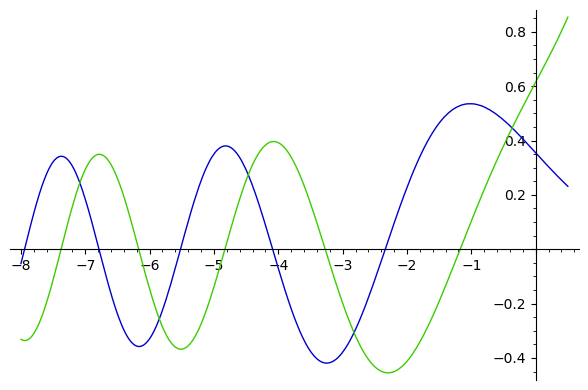

In [25]:
plot([airy_ai(xi_1), airy_bi(xi_1)], xi_1, -8, 0.5)

Проверка - подставляем решение в уравнение

In [26]:
disp(airy_ai(x).diff(x,2).expand())

<IPython.core.display.Math object>

In [27]:
disp(airy_bi(x).diff(x,2).expand())

<IPython.core.display.Math object>

https://en.wikipedia.org/wiki/Airy_function

In [257]:
def airy_ai_approx_plus(x, N):
    var("n")
    return 1/(2*sqrt(pi)*x^(1/4)) * \
        exp(-2/3*x^(3/2)) * \
        sum(((-1)^n * gamma(n+5/6) * gamma(n+1/6) * (3/4)^n)/(2*pi*factorial(n)*x^(3*n/2)) ,
           n, 0, N)

In [258]:
def airy_ai_approx_minus(x, N):
    var("n")
    return 1/(sqrt(pi)*x^(1/4)) * \
        sin(2/3*x^(3/2)+pi/4) * \
        sum(((-1)^n * gamma(2*n+5/6) * gamma(2*n+1/6) * (3/4)^(2*n))/(2*pi*factorial(2*n)*x^(3*n)) ,
           n, 0, N) \
        - 1/(sqrt(pi)*x^(1/4)) * \
        cos(2/3*x^(3/2)+pi/4) * \
        sum(((-1)^n * gamma(2*n+11/6) * gamma(2*n+7/6) * (3/4)^(2*n+1))/(2*pi*factorial(2*n+1)*x^((3*n+3)/2)) ,
           n, 0, N)

In [259]:
def airy_bi_approx_minus(x, N):
    var("n")
    return 1/(sqrt(pi)*x^(1/4)) * \
        cos(2/3*x^(3/2)+pi/4) * \
        sum(((-1)^n * gamma(2*n+5/6) * gamma(2*n+1/6) * (3/4)^(2*n))/(2*pi*factorial(2*n)*x^(3*n)) ,
           n, 0, N) \
        + 1/(sqrt(pi)*x^(1/4)) * \
        sin(2/3*x^(3/2)+pi/4) * \
        sum(((-1)^n * gamma(2*n+11/6) * gamma(2*n+7/6) * (3/4)^(2*n+1))/(2*pi*factorial(2*n+1)*x^((3*n+3)/2)) ,
           n, 0, N)

In [260]:
def airy_bi_approx(x, N):
    var("n")
    return 1/(sqrt(pi)*x^(1/4)) * \
        exp(2/3*x^(3/2)) * \
        sum((gamma(n+5/6) * gamma(n+1/6) * (3/4)^n)/(2*pi*factorial(n)*x^(3*n/2)) ,
           n, 0, N)

In [261]:
disp(airy_ai_approx_plus(x, var("N")))

<IPython.core.display.Math object>

In [262]:
disp(airy_ai_approx_minus(x, var("N")))

<IPython.core.display.Math object>

In [263]:
disp(airy_bi_approx(x, var("N")))

<IPython.core.display.Math object>

In [264]:
disp(airy_bi_approx_minus(x, var("N")))

<IPython.core.display.Math object>

In [ ]:
plot([airy_ai_approx_minus(-xi_1, 3).real(), airy_ai(xi_1)], xi_1, -8, -1)

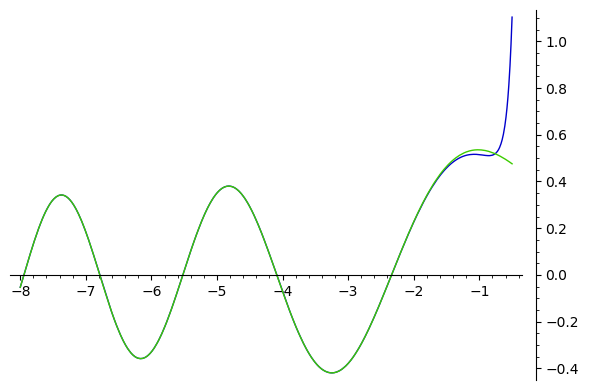

In [31]:
plot([2*airy_ai_approx_plus(xi_1, 3).real(), airy_ai(xi_1)], xi_1, -8, -0.5)

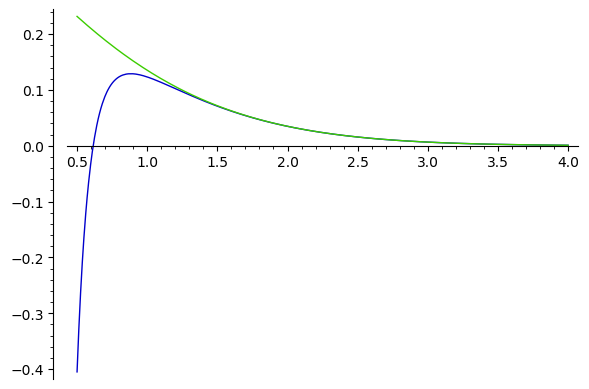

In [32]:
plot([airy_ai_approx_plus(xi_1, 3).real(), airy_ai(xi_1)], xi_1, 0.5, 4)

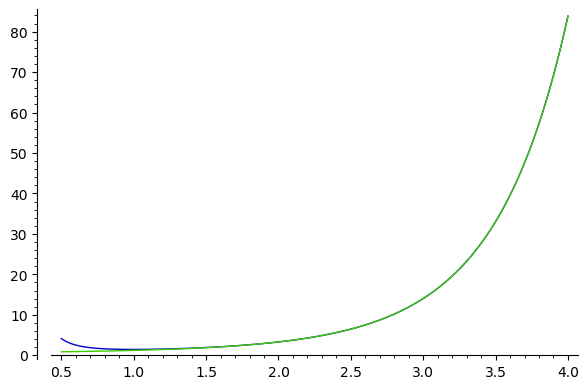

In [33]:
plot([airy_bi_approx(xi_1, 3).real(), airy_bi(xi_1)], xi_1, 0.5, 4)

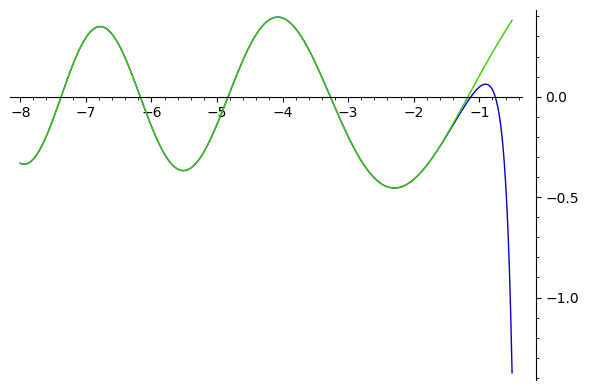

In [34]:
plot([airy_bi_approx(xi_1, 3).real(), airy_bi(xi_1)], xi_1, -8, -0.5)

In [ ]:
plot([airy_bi_approx_minus(-xi_1, 3).real(), airy_bi(xi_1)], xi_1, -8, -1)

# А в какой области значений $\xi_1$ нам нужно искать решение?

найдем выражение для характерной длины

In [35]:
disp(eq_len_1.solve(l_1))

<IPython.core.display.Math object>

In [36]:
s_l_1 = eq_len_1.solve(l_1)[2]
disp(s_l_1)

<IPython.core.display.Math object>

In [37]:
disp(s_l_1.subs(values).rhs().n())

<IPython.core.display.Math object>

найдем выражение для безразмерного энергетического параметра $\lambda_1$

In [38]:
s_lambda_1 = energy_param_1.solve(lambda_1)[0]
disp(s_lambda_1)

<IPython.core.display.Math object>

In [39]:
disp(s_lambda_1.subs(s_l_1))

<IPython.core.display.Math object>

In [40]:
displ(latex("\\lambda_1 = " + latex(s_lambda_1.subs(s_l_1).subs(values).rhs().n())))

<IPython.core.display.Math object>

In [41]:
s_lambda_1

lambda_1 == 2*E*l_1^2*m_1/h^2

Рассмотрим область определения параметра $\xi_1$

In [42]:
xi_1_x(x) = s_xi_1.subs(s_lambda_1).subs(s_l_1).rhs()
displ("\\xi_1(x) = "+ latex(xi_1_x(x)))

<IPython.core.display.Math object>

In [43]:
xi_1x_subs = xi_1_x.subs(values_abmh)
displ("\\xi_1(x) = "+ latex(xi_1x_subs(x)))

<IPython.core.display.Math object>

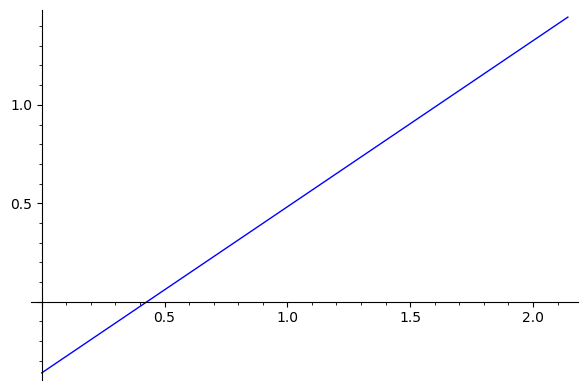

In [44]:
plot(xi_1x_subs(x).subs([U_0 == 5*eV, E == 1*eV]), x, 0, _b)

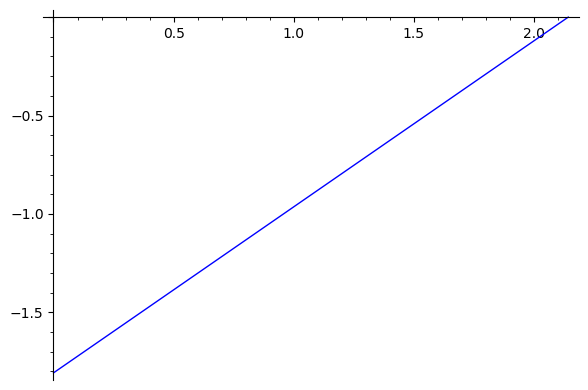

In [45]:
plot(xi_1x_subs(x).subs([U_0 == 5*eV, E == 5*eV]), x, 0, _b)

Вопрос - при каких значениях энегрии допустимо при сшивке функцию Эйри заменять ее аппроксимацией

In [46]:
xi_1x_subs(x = 0).subs([U_0 == 5*eV, E == 1*eV]).n()

-0.361410435180785

In [47]:
xi_1x_subs(x = _b).subs([U_0 == 5*eV, E == 1*eV]).n()

1.44564174072313

In [48]:
xi_1x_subs(x = 0).subs([U_0 == 5*eV, E == 5*eV]).n()

-1.80705217590392

In [49]:
xi_1x_subs(x = _b).subs([U_0 == 5*eV, E == 5*eV]).n()

-7.27372546577658e-15

# Уравнение Шредингера на интервале от $b$ до $a$

$\frac {\partial^2 u}{\partial x^2} + \frac{2 m_2}{\hbar^2} \left(E - U_2(x)\right)u = 0$

In [50]:
eq_ba(n) = diff(u_2,x,2) + 2*m_2/h^2 * (E - U_2(x,n)) * u_2 == 0
disp(eq_ba(n))

<IPython.core.display.Math object>

In [51]:
disp(eq_ba(n=0))

<IPython.core.display.Math object>

In [52]:
disp(eq_ba(n=0).expand())

<IPython.core.display.Math object>

In [53]:
_A = 0
_B = 0
_C = 0
eq_ba_d2 = 0
for operand in eq_ba(n=0).expand().lhs().operands():
    from sage.symbolic.operators import add_vararg, mul_vararg
    if mul_vararg == operand.operator():
        op = operand.operands()

        if E in op:
            _A += (operand/u_2(x=x)).full_simplify()
        else:
            if x in op:
                _B += operand/u_2(x=x)/(x)
            else:
                _C += operand/u_2(x=x)
    else:
        eq_ba_d2 += operand

In [54]:
sA = A == _A
sB = B == _B
sC = C == _C
disp(sA)
disp(sB)
disp(sC)

eq_ba_subs = eq_ba_d2 + (A + B*x + C)*u_2(x=x) == 0
disp(eq_ba_subs)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Как и в задаче 41 Флюге т.1 вводим следующие обозначения

In [55]:
var("l_2, lambda_2, xi_2")

(l_2, lambda_2, xi_2)

безразмерный энергетический параметр $\lambda_2$

In [56]:
energy_param_2 = _A == lambda_2 / l_2^2
disp(energy_param_2)

<IPython.core.display.Math object>

характерная длина $l_2$

In [57]:
eq_len_2 = -_B == 1/l_2^3
disp(eq_len_2)

<IPython.core.display.Math object>

In [58]:
eq_len_2 = _B == 1/(-l_2)^3
disp(eq_len_2)

<IPython.core.display.Math object>

Подставляя введенные обозначения в исходное уравнение Шредингера на интервале от $b$ до $a$

In [59]:
eq_ba_l_lambda = eq_ba(n=0).expand().subs(energy_param_2.solve(E)).subs(eq_len_2.solve(U_0))
disp(eq_ba_l_lambda)

<IPython.core.display.Math object>

вводим безразмерную переменную $\xi_2$

In [60]:
s_xi_2 = xi_2 == (a-x)/l_2 + lambda_2
disp(s_xi_2)

<IPython.core.display.Math object>

In [61]:
eq_ba_xi = eq_ba_l_lambda.subs(s_xi_2.solve(x)).expand()
disp(eq_ba_xi)

<IPython.core.display.Math object>

получаем дифференциальное уравнение

$$\frac{\partial^2 u_2(\xi_2)}{\partial \xi_2^2} + \xi_2 u_2(\xi_2) = 0$$

решение этого уравнения

In [62]:
sol_u2(xi_2) = sqrt(pi)*exp(-I*pi/6)*(C*airy_ai(-xi_2)-D*I*airy_bi(-xi_2))
disp(sol_u2)

<IPython.core.display.Math object>

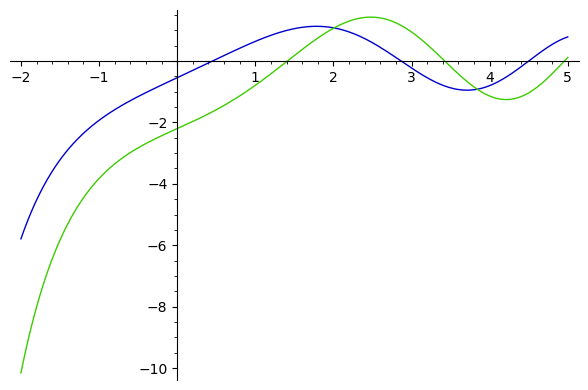

In [63]:
plot([sol_u2.subs(C == 1,D == 2).real(),sol_u2.subs(C == 1, D == 2).imag()], xi_2, -2, 5)

In [64]:
test_sol_u2 = (diff(sol_u2(xi_2), xi_2, 2)+xi_2*sol_u2(xi_2)).expand()
disp(test_sol_u2)

<IPython.core.display.Math object>

# А в какой области значений $\xi_2$ нам нужно искать решение?

найдем выражение для характерной длины $l_2$

но для начала заменяем характерную длину на отрицательную характерную длину

In [65]:
var("minus_l_2")
eq_minus_len_2 = eq_len_2.subs(l_2 == -minus_l_2)
disp(eq_minus_len_2)

<IPython.core.display.Math object>

In [66]:
s_ml_2 = eq_minus_len_2.solve(minus_l_2)
for si_ml_2 in s_ml_2:
    disp(si_ml_2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [67]:
s_ml_2 = eq_minus_len_2.solve(minus_l_2)
for si_ml_2 in s_ml_2:
    disp(si_ml_2.subs(values).rhs().n())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [68]:
s_l_2 = -s_ml_2[2].subs(minus_l_2 == -l_2)
disp(s_l_2)

<IPython.core.display.Math object>

In [69]:
disp(s_l_2.subs(values))

<IPython.core.display.Math object>

найдем выражение для безразмерного энергетического параметра $\lambda_2$

In [70]:
s_lambda_2 = energy_param_2.solve(lambda_2)[0]
disp(s_lambda_2)

<IPython.core.display.Math object>

In [71]:
disp(s_lambda_2.subs(s_l_2))

<IPython.core.display.Math object>

In [72]:
disp(s_lambda_2.subs(s_l_2).subs(values))

<IPython.core.display.Math object>

Рассмотрим область определения параметра $\xi_2$

In [73]:
xi_2_x(x) = s_xi_2.subs(energy_param_2.solve(lambda_2)).subs(s_l_2).rhs()
displ("\\xi_2(x) = " + latex(xi_2_x(x)))

<IPython.core.display.Math object>

In [74]:
xi_2x_subs(x) = xi_2_x(x).subs(values_abmh)
displ("\\xi_2(x) = "+ latex(xi_2x_subs(x)))

<IPython.core.display.Math object>

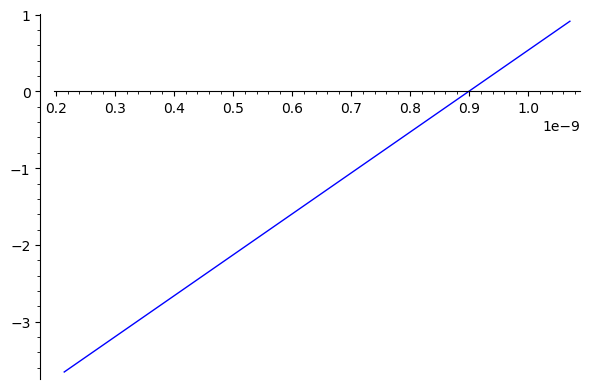

In [75]:
plot(xi_2x_subs(x).subs([U_0 == 5*eV, E == 1*eV]), x, _b, _a)

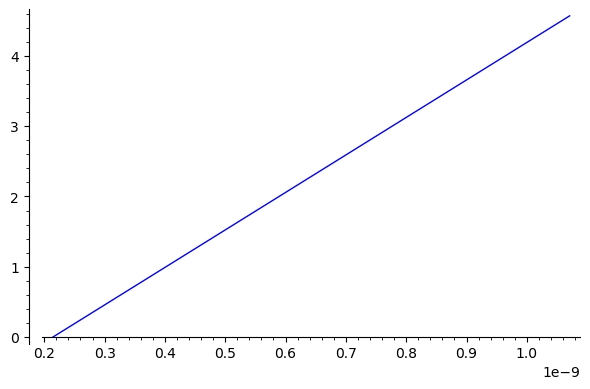

In [76]:
plot(xi_2x_subs(x).subs([U_0 == 5*eV, E == 5*eV]), x, _b, _a)

Вопрос - при каких значениях энергии допустимо при сшивке функцию Эйри заменять ее аппроксимацией

In [77]:
xi_2x_subs(x = _b).subs([U_0 == 5*eV, E == 1*eV])

-3.65513745094084

In [78]:
xi_2x_subs(x = _a).subs([U_0 == 5*eV, E == 1*eV])

0.913784362735214

In [79]:
xi_2x_subs(x = _b).subs([U_0 == 5*eV, E == 5*eV])

1.77635683940025e-14

In [80]:
xi_2x_subs(x = _b).subs([U_0 == 5*eV, E == 4*eV])

-0.913784362735197

In [81]:
xi_2x_subs(x = _b).subs([U_0 == 5*eV, E == 6*eV])

0.913784362735232

In [82]:
xi_2x_subs(x = _a).subs([U_0 == 5*eV, E == 5*eV])

4.56892181367607

Получается, что наибольшие расхождения будут ожидаться при сшивке аппроксимированных функций в точке $b$ если значения $E$ и $U_0$ близки друг к другу

# Решение уравнения Шредингера на интервале от $0$ до $b$ при $n \neq 0$

In [187]:
u_0b(x, n) = exp(I*n*K*a) * (A * exp(I*k*(x-n*a)) + B*exp(-I*k*(x-n*a)))
disp(u_0b(x, n))

<IPython.core.display.Math object>

In [189]:
u_0b(x, n) = exp(I*n*K*a) * (A * airy_ai(xi_1) + B*airy_bi(xi_1))
disp(u_0b(x, n))
assume(A, "real")
assume(B, "real")
u_0b(x, n).real()

<IPython.core.display.Math object>

A*cos(K*a*n)*real_part(airy_ai(xi_1)) + B*cos(K*a*n)*real_part(airy_bi(xi_1)) - A*imag_part(airy_ai(xi_1))*sin(K*a*n) - B*imag_part(airy_bi(xi_1))*sin(K*a*n)

In [188]:
u_0b(x, n) = exp(I*n*K*a) * (A * airy_ai(xi_1_x(x-n*a)) + B*airy_bi(xi_1_x(x-n*a)))
disp(u_0b(x, n))

<IPython.core.display.Math object>

In [190]:
u_0b(xi_1, n) = A*cos(K*a*n)*real_part(airy_ai(xi_1)) \
              + B*cos(K*a*n)*real_part(airy_bi(xi_1)) \
              - A*imag_part(airy_ai(xi_1))*sin(K*a*n) \
              - B*imag_part(airy_bi(xi_1))*sin(K*a*n)

In [191]:
u_0b(xi_1, n) = A*cos(K*a*n)*airy_ai(xi_1) \
              + B*cos(K*a*n)*airy_bi(xi_1)
disp(u_0b(xi_1, n))

<IPython.core.display.Math object>

In [192]:
u_0b(x, n) = u_0b(xi_1_x(x-n*a), n)
disp(u_0b(x, n))

<IPython.core.display.Math object>

Решение уравнения Шредингера на интервале от $0$ до $b$ при $n = 0$

In [193]:
disp(u_0b(x, n=0))

<IPython.core.display.Math object>

Первая производная

In [194]:
exec(preparse("D0_u_0b(x) = " + str(u_0b(x, n=0).diff(x))))
disp(D0_u_0b(x))

<IPython.core.display.Math object>

Подставляем решение на интервале от $0$ до $b$ при $n \neq 0$ в само уравнение

In [195]:
eq_u_0b_n = eq_0b(n).substitute_function(u_1 == u_0b(x,n))
disp(eq_u_0b_n)

<IPython.core.display.Math object>

Подставляем решение на интервале от $0$ до $b$ при $n = 0$ в само уравнение

In [196]:
eq_u_0b = eq_0b(n=0).substitute_function(u_1 == u_0b(x, n = 0))
disp(eq_u_0b)

<IPython.core.display.Math object>

In [197]:
disp(eq_u_0b_n.subs(values_abmh).variables())

<IPython.core.display.Math object>

# Решение уравнения Шредингера на интервале от $b$ до $a$ при $n \neq 0$

In [198]:
u_ba(x, n) = exp(I*n*K*a) * (C * exp(I*k*(x-n*a)) + D*exp(-I*k*(x-n*a)))
disp(u_ba(x, n))

<IPython.core.display.Math object>

In [199]:
assume(xi_2, "real")
assume(C, "real")
assume(D, "real")
u_ba(x, n) = exp(I*n*K*a) * sol_u2(xi_2)
u_ba(x, n).real()

1/2*sqrt(3)*sqrt(pi)*D*cos(K*a*n)*imag_part(airy_bi(-xi_2)) + 1/2*sqrt(3)*sqrt(pi)*C*cos(K*a*n)*real_part(airy_ai(-xi_2)) - 1/2*sqrt(3)*sqrt(pi)*C*imag_part(airy_ai(-xi_2))*sin(K*a*n) + 1/2*sqrt(3)*sqrt(pi)*D*real_part(airy_bi(-xi_2))*sin(K*a*n) + 1/2*sqrt(pi)*C*cos(K*a*n)*imag_part(airy_ai(-xi_2)) - 1/2*sqrt(pi)*D*cos(K*a*n)*real_part(airy_bi(-xi_2)) + 1/2*sqrt(pi)*D*imag_part(airy_bi(-xi_2))*sin(K*a*n) + 1/2*sqrt(pi)*C*real_part(airy_ai(-xi_2))*sin(K*a*n)

In [200]:
u_ba(x, n) = exp(I*n*K*a) * sol_u2(xi_2_x(x-n*a))
disp(u_ba(x, n))

<IPython.core.display.Math object>

In [201]:
u_ba(x, n) = 1/2*sqrt(3)*sqrt(pi)*D*cos(K*a*n)*imag_part(airy_bi(-xi_2)) \
           + 1/2*sqrt(3)*sqrt(pi)*C*cos(K*a*n)*real_part(airy_ai(-xi_2)) \
           - 1/2*sqrt(3)*sqrt(pi)*C*imag_part(airy_ai(-xi_2))*sin(K*a*n) \
           + 1/2*sqrt(3)*sqrt(pi)*D*real_part(airy_bi(-xi_2))*sin(K*a*n) \
           + 1/2*sqrt(pi)*C*cos(K*a*n)*imag_part(airy_ai(-xi_2)) \
           - 1/2*sqrt(pi)*D*cos(K*a*n)*real_part(airy_bi(-xi_2)) \
           + 1/2*sqrt(pi)*D*imag_part(airy_bi(-xi_2))*sin(K*a*n) \
           + 1/2*sqrt(pi)*C*real_part(airy_ai(-xi_2))*sin(K*a*n)

In [202]:
u_ba(xi_2, n) = \
           + 1/2*sqrt(3)*sqrt(pi)*C*cos(K*a*n)*airy_ai(-xi_2) \
           + 1/2*sqrt(3)*sqrt(pi)*D*airy_bi(-xi_2)*sin(K*a*n) \
           - 1/2*sqrt(pi)*D*cos(K*a*n)*airy_bi(-xi_2) \
           + 1/2*sqrt(pi)*C*airy_ai(-xi_2)*sin(K*a*n)
disp(u_ba(xi_2, n))

<IPython.core.display.Math object>

In [203]:
u_ba(x, n) = u_ba(xi_2_x(x-n*a), n)
disp(u_ba(x, n))

<IPython.core.display.Math object>

Решение уравнения Шредингера на интервале от $b$ до $a$ при $n=0$

In [204]:
disp(u_ba(x, n=0))

<IPython.core.display.Math object>

Подставляем решение на интервале от $b$ до $a$ при $n \neq 0$ в само уравнение

Подставляем решение на интервале от $b$ до $a$ при $n = 0$ в само уравнение

In [ ]:
plt = Graphics()
for _n in range(-1,2):
    plt += plot(u_0b(x, n = _n).subs(values).subs([A == 1, B == 1, C == 1, D == 1]), x, _n*_a, _n*_a+_b)
    plt += plot(u_ba(x, n = _n).subs(values).subs([A == 1, B == 1, C == 1, D == 1]), x, _n*_a+_b, (_n+1)*_a)

# сшиваем оба решения в точке $b$

In [205]:
link_u_xb = u_0b(x=b, n=0) == u_ba(x=b, n=0)
disp(link_u_xb)

<IPython.core.display.Math object>

In [206]:
link_dudx_xb = u_0b(x, n=0).diff(x).subs(x == b) \
            == u_ba(x, n=0).diff(x).subs(x == b)
disp(link_dudx_xb)

<IPython.core.display.Math object>

# сшиваем оба решения в точке $a$

In [207]:
link_u_xa = u_ba(x=a, n=0) == u_0b(x=a, n=1)
disp(link_u_xa)

<IPython.core.display.Math object>

In [208]:
link_dudx_xa = u_ba(x, n=0).diff(x).subs(x == a) \
            == u_0b(x, n=1).diff(x).subs(x == a)

disp(link_dudx_xa)

<IPython.core.display.Math object>

Получаем систему 4 уравнений относительно 4 неизвестных коэффициентов $A,B,C,D$.

In [209]:
sys = [link_u_xb, link_dudx_xb,
       link_u_xa, link_dudx_xa]

Данная система имеет нетривиальные решения, если ее определитель равен нулю

In [210]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [213]:
vars = [A, B, C, D]

In [215]:
M = GenerateMatrix(sys, vars)

In [217]:
disp(M)

<IPython.core.display.Math object>

In [243]:
det_M = M.determinant()
sol_cosKa = solve(det_M == 0, cos(K*a))[0]

In [244]:
sol_cosKa.rhs().variables()

(E, U_0, a, b, h, m_1, m_2)

In [248]:
v_cosKa(E, U_0) = sol_cosKa.rhs().subs(values_abmh)

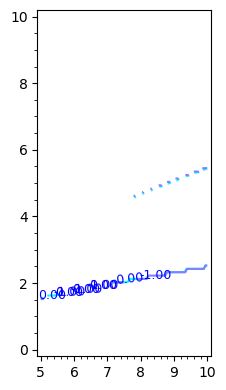

In [256]:
contour_plot(v_cosKa(E*eV, U_0*eV), (U_0, 5, 15), (E, 0, 10), contours=[-1, 0, 1],
             fill=False, cmap='cool', labels=True, label_inline=True)

In [276]:
vb_cosKa(E, b) = sol_cosKa.rhs().subs(values_amh).subs(U_0 == 5*eV)

In [ ]:
contour_plot(vb_cosKa(E*eV, b*_a), (b, 0, 1), (E, 0, 10), contours=[-1, 0, 1],
             fill=False, cmap='cool', labels=True, label_inline=True)

In [274]:
va_cosKa(E, a) = sol_cosKa.rhs().subs(values_mh).subs(U_0 == 5*eV).subs(b == a/5)

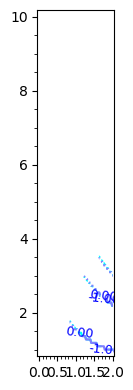

In [275]:
contour_plot(va_cosKa(E*eV, a*_a), (a, 1, 10), (E, 1, 10), contours=[-1, 0, 1],
             fill=False, cmap='cool', labels=True, label_inline=True)

In [251]:
vM = M.subs(values_abmh).subs(U_0 == 5*eV)

In [221]:
vM.variables()

(E, K)

In [228]:
det_vM(K,E) = vM.determinant()

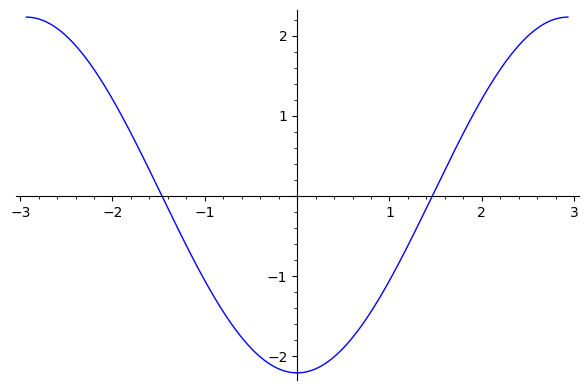

In [229]:
plot(det_vM(K, E = 1*eV), K, -pi/_a, +pi/_a)

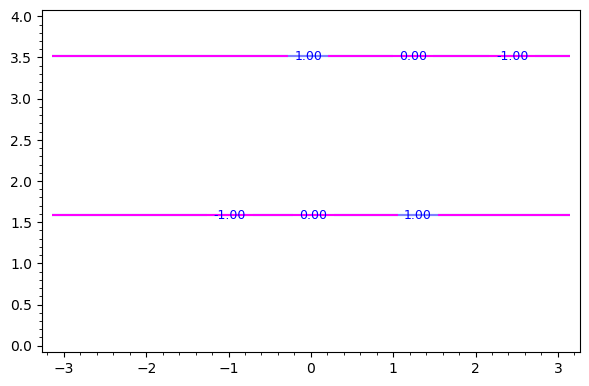

In [242]:
contour_plot(det_vM(K*_a, E*eV), (K, -pi, +pi), (E, 0, 4), contours=[-1, 0, 1],
             fill=False, cmap='cool', labels=True, label_inline=True)